# Air France Reviews Dataset

In [91]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

import warnings
warnings.filterwarnings('ignore')

In [92]:
air_france_reviews_dataset_path = kagglehub.dataset_download('saharnazyaghoobpoor/air-france-reviews-dataset')

In [93]:
## loading the data
reviews_data = pd.read_csv(
    "airfrance_tripadvisor_reviews.csv"
)

reviews_data.head()

,rating,title,text,publishedDate
0,1,WORST AIRLINE,I travel a lot - and I travel often. Last week...,2024-11-13
1,1,Terrible experience with Airfrance,"This review is regarding flight AF185, we book...",2024-11-13
2,1,Extremely Disappointing Experience with Air Fr...,I recently flew with Air France on flight #185...,2024-11-12
3,1,Horrible,Wow!!! What a horrible experience!! I've alway...,2024-11-11
4,1,The Worst Flight Experience I’ve Ever Had,I spent a fantastic 10-day vacation in Hong Ko...,2024-11-11


In [94]:
## renaming columns
reviews_data.rename(columns = {"publishedDate" : "date"}, inplace = True)
reviews_data.head()

,rating,title,text,date
0,1,WORST AIRLINE,I travel a lot - and I travel often. Last week...,2024-11-13
1,1,Terrible experience with Airfrance,"This review is regarding flight AF185, we book...",2024-11-13
2,1,Extremely Disappointing Experience with Air Fr...,I recently flew with Air France on flight #185...,2024-11-12
3,1,Horrible,Wow!!! What a horrible experience!! I've alway...,2024-11-11
4,1,The Worst Flight Experience I’ve Ever Had,I spent a fantastic 10-day vacation in Hong Ko...,2024-11-11


In [95]:
## ordering columns
reviews_data = reviews_data[['date', 'title', 'text', 'rating']]

In [96]:
## final view
reviews_data.head()

,date,title,text,rating
0,2024-11-13,WORST AIRLINE,I travel a lot - and I travel often. Last week...,1
1,2024-11-13,Terrible experience with Airfrance,"This review is regarding flight AF185, we book...",1
2,2024-11-12,Extremely Disappointing Experience with Air Fr...,I recently flew with Air France on flight #185...,1
3,2024-11-11,Horrible,Wow!!! What a horrible experience!! I've alway...,1
4,2024-11-11,The Worst Flight Experience I’ve Ever Had,I spent a fantastic 10-day vacation in Hong Ko...,1


In [97]:
## checking dtypes
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2560 non-null   object
 1   title   2560 non-null   object
 2   text    2560 non-null   object
 3   rating  2560 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 80.1+ KB


In [98]:
## changing datetime
reviews_data['date'] = pd.to_datetime(
    reviews_data['date']
)

In [99]:
## checking the dtypes
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2560 non-null   datetime64[ns]
 1   title   2560 non-null   object        
 2   text    2560 non-null   object        
 3   rating  2560 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 80.1+ KB


## EDA and Visualization

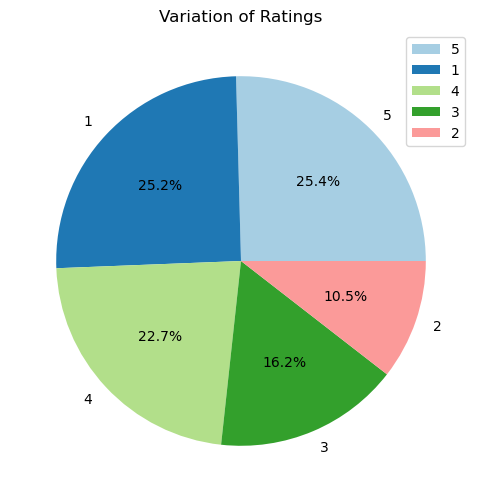

In [100]:
# Plotting the pie chart
reviews_data.rating.value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentage
    colors=plt.cm.Paired.colors,  # Color palette
    title='Variation of Ratings',
    ylabel='',  # No label for the y-axis
    legend=True,  # Show legend
    figsize=(6, 6)  # Size of the plot
)

plt.ylabel('')  # Remove the ylabel to clean up the plot
plt.show()

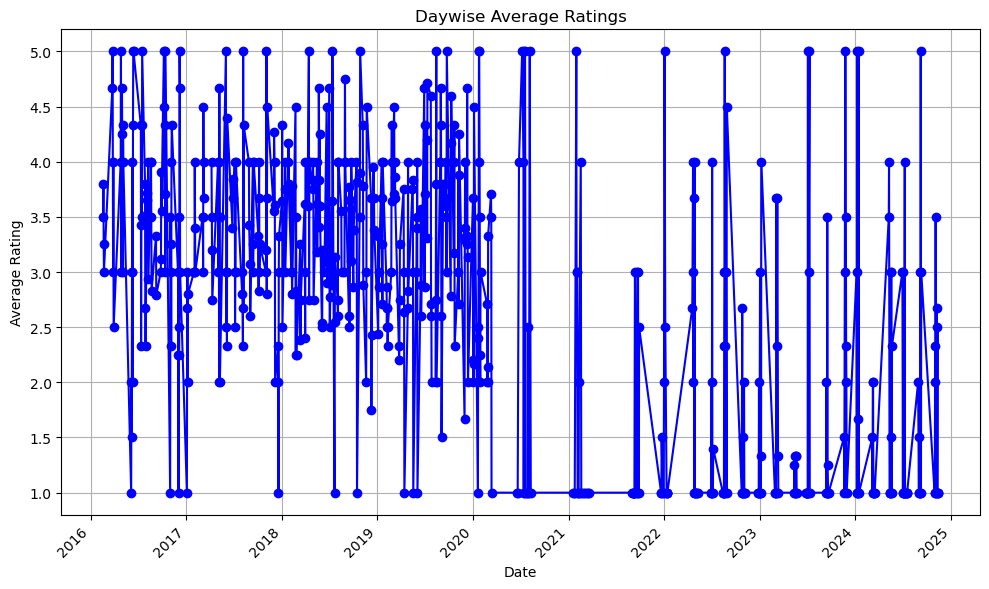

In [101]:
## visualizing the ratings daywise - Any Trend to Follow up

daywise_ratings = reviews_data.groupby(['date'])['rating'].mean().round(2)

# Plotting the trend of ratings over time
plt.figure(figsize=(10, 6))
daywise_ratings.plot(marker='o', linestyle='-', color='b', title='Daywise Average Ratings')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Not Much appealing, so will be moving towards, `monthwise ratings`

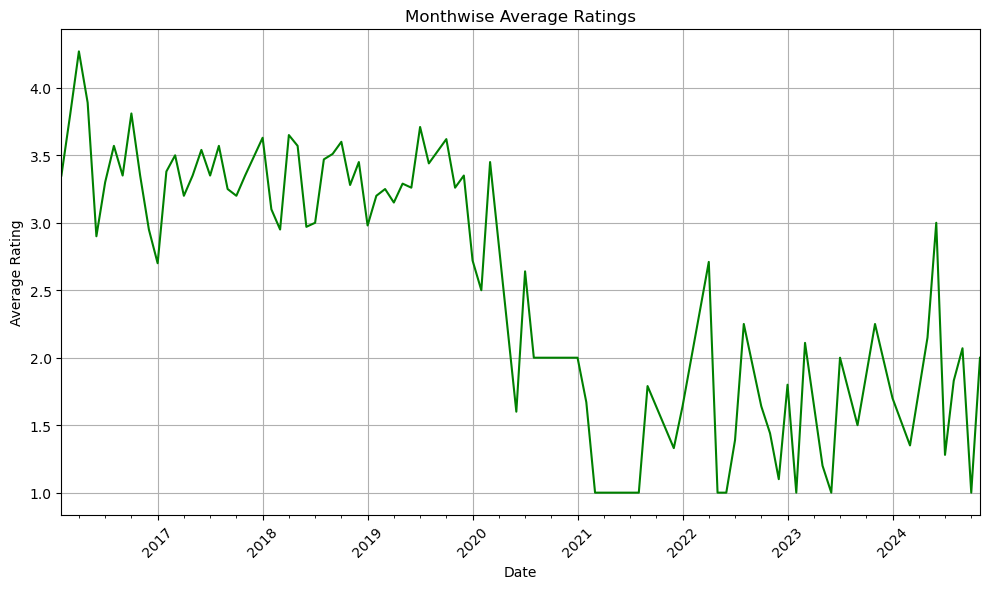

In [102]:
## visualizing the ratings Monthwise - Any Trend to Follow up

monthwise_ratings = reviews_data.groupby(reviews_data['date'].dt.to_period('M'))['rating'].mean().round(2)
# monthwise_ratings

# Plotting the trend of ratings over time
plt.figure(figsize=(10, 6))
monthwise_ratings.plot(linestyle='-', color='g', title='Monthwise Average Ratings')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p> -----
    Clearly visible that ratings have been down post pandemic
    -----
</p>

In [103]:
## yearly reviews count
yearly_reviews = reviews_data.groupby([reviews_data['date'].dt.to_period('A'), 'rating'])['date'].size().reset_index(name='count')

## yearly total reviews
yearly_total_reviews = yearly_reviews.groupby(['date'])['count'].sum().reset_index(name = 'total_reviews')

## merge total reviews back to the actual data
yearly_reviews = yearly_reviews.merge(yearly_total_reviews, on = 'date')

## percentage of reviews yearwise
yearly_reviews['review_pct'] = (100.0 * yearly_reviews['count']/yearly_reviews['total_reviews']).round(2)

# Pivot the table for a cleaner view (optional)
yearly_reviews_pivot = yearly_reviews.pivot(index='date', columns='rating', values='review_pct').fillna(0)

In [104]:
yearly_reviews_pivot

rating,1,2,3,4,5
date,,,,,
2016,13.00,11.50,17.25,31.50,26.75
2017,14.80,9.60,22.00,26.80,26.80
2018,16.47,11.91,17.65,25.59,28.38
2019,18.60,9.80,18.00,23.60,30.00
2020,35.00,15.00,14.00,14.00,22.00
2021,77.55,4.08,6.12,4.08,8.16
2022,74.26,4.95,3.96,5.94,10.89
2023,73.64,9.09,0.91,3.64,12.73
2024,70.83,10.83,3.33,1.67,13.33


<Figure size 1000x600 with 0 Axes>

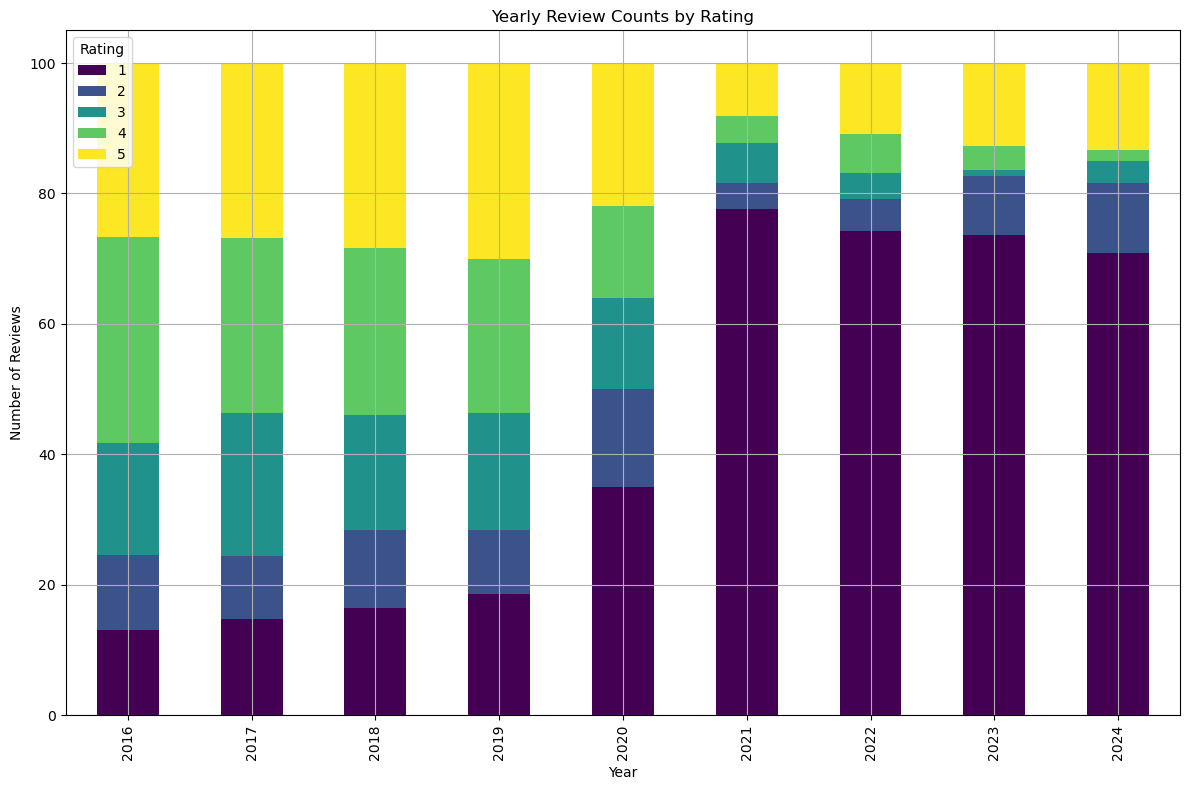

In [105]:
# Plotting yearly reviews count (optional)
plt.figure(figsize=(10, 6))
yearly_reviews_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8), title='Yearly Review Counts by Rating')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

In [106]:
reviews_data.sample(10)

,date,title,text,rating
1559,2018-03-12,Flight cancelled,Our flight from Miami to Paris was cancelled w...,1
913,2019-02-25,flight attendants are very friendly,The flight was delayed for a couple of hours d...,5
844,2019-04-13,The connection flight from hell.. don’t fly wi...,My one hour flight to Paris to get my connecti...,1
1224,2018-08-30,Leg Room and a Delicious Dessert,"CDG airport is busy, and rather difficult to f...",5
778,2019-06-15,Worse experience,Everything was going fine until we landed to P...,1
1714,2017-12-04,Good airline,Flights both ways were on time and complimenta...,4
129,2023-11-27,Unsettling experience,Unsettling experience. I was given a seat ass...,1
1241,2018-08-17,Very Bad Lost Luggage Handling Service,I am very disappointed in Air France and I was...,1
2044,2017-06-06,South America avoiding Heathrow and BA,Air France and their partners KLM have several...,4
1733,2017-12-01,Travelling La Première and L'Effet Papillon,Friday afternoon. Airport. Nice - France. We w...,2


## 1. Time Period Segmentation

*Divide the data into meaningful periods*
  1. #### Pre-pandemic (2016-2018)
  2. #### Pandemic (2019-2020)
  3. #### Post-pandemic (2021-2024)

In [107]:
## creating segments of the reviews

prepandemic_df = reviews_data[reviews_data['date'] <= '2018-12-31']
pandemic_df = reviews_data[(reviews_data['date'] > '2018-12-31') & (reviews_data['date'] <= '2020-12-31')]
postpandemic_df = reviews_data[reviews_data['date'] > '2020-12-31']

prepandemic_df.date.max(), prepandemic_df.date.min(), pandemic_df.date.max(), pandemic_df.date.min(), postpandemic_df.date.max(), postpandemic_df.date.min()

(Timestamp('2018-12-20 00:00:00'),
 Timestamp('2016-02-18 00:00:00'),
 Timestamp('2020-08-09 00:00:00'),
 Timestamp('2019-01-04 00:00:00'),
 Timestamp('2024-11-13 00:00:00'),
 Timestamp('2021-01-19 00:00:00'))

## 2. Sentiment Analysis

### Classify Reviews: Use text analysis to classify reviews as positive, neutral, or negative based on the rating:
   1. *Ratings 4-5*: **Positive**
   2. *Ratings 3*: **Neutral**
   3. *Ratings 1-2*: **Negative**

In [108]:
## function to map the reviews to the segments
def segment_ratings(df):
    if df['rating'] <= 2:
        return 'Negative'
    elif df['rating'] == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [109]:
## applying the function to all the segments
prepandemic_df.loc[:, 'rating_segment'] = prepandemic_df.apply(segment_ratings, axis = 1)
pandemic_df.loc[:, 'rating_segment'] = pandemic_df.apply(segment_ratings, axis = 1)
postpandemic_df.loc[:, 'rating_segment'] = postpandemic_df.apply(segment_ratings, axis = 1)

In [110]:
## checking the data
# prepandemic_df.sample(10)
# pandemic_df.sample(10)
# postpandemic_df.sample(10)

### Extract Key Topics:
    Using Natural Language Processing (NLP)

In [111]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download NLTK stopwords
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(['air', 'france']) ## adding custom stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Function to extract topics
def extract_topics(df, n_topics=15, n_top_words=15):
    # Preprocess the text data
    df['clean_text'] = df['text'].apply(preprocess_text)
    
    # Fit the count vectorizer with bigrams
    count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_df=0.95)
    count_data = count_vectorizer.fit_transform(df['clean_text'])
    
    # Fit the LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(count_data)
    
    # Get the topics
    topics = {}
    for i, topic in enumerate(lda.components_):
        topics[f'Topic {i}'] = [count_vectorizer.get_feature_names_out()[index] for index in topic.argsort()[:-n_top_words - 1:-1]]
    
    return pd.DataFrame(topics)
    
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
## extracting topics for all ratings segments for all the segments [Prepandemic]
prepandemic_neg_topics = extract_topics(prepandemic_df[prepandemic_df['rating_segment'] == 'Negative'])
prepandemic_neu_topics = extract_topics(prepandemic_df[prepandemic_df['rating_segment'] == 'Neutral'])
prepandemic_pos_topics = extract_topics(prepandemic_df[prepandemic_df['rating_segment'] == 'Positive'])

In [113]:
prepandemic_neg_topics

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14
0,flight delayed hours,press option option,soy bean salad,connecting flight paris,flight cph cdg,seat exit row,ground staff bologna,received email saying,connecting flight paris,extra leg room,premium economy seat,charles gaulle airport,change klm com,luggage got lost,oh madame asked
1,flight fully booked,family got email,business class af,end runway ppt,uncomfortable flight seats,cruise luggage delivered,people came forth,service desk number,stroller got plane,flight code share,line customer service,hr later arrived,travel agency website,baggage submitted airline,gate oh madame
2,hours flight cancellation,refused pay compensation,business class passengers,late leaving arriving,business class seats,begin cruise luggage,food business class,upgraded business class,gate catch bus,leg room seats,extra leg room,told make line,klm com purchased,days received baggage,crete oh madame
3,business class seats,use available planes,battery allowed board,kid wife parents,tv screens small,flight sao paulo,flight flight attendants,business class flight,canceled direct flight,snr vice president,paris charles gaulle,follow progress luggage,impossible change klm,booked internal flight,allow catch flight
4,premium economy seats,missed connecting flight,af business class,wife parents law,absolutely ruined trip,delayed late arrival,business class seats,flight low cost,flight paris cancelled,long haul flight,missed connecting flight,connecting flight paris,com purchased travel,submitted airline days,luggage going make
5,year old son,flat business class,worst experience life,family year old,seats business class,upgrade premium economy,days leave paris,leaves lot desired,hours glass water,left minutes late,af premium economy,premium economy seats,purchased travel agency,airline days received,travelling washington dc
6,hours flight drinks,paris hours flight,missed connection cdg,delayed hours causing,fly checked luggage,flight attendants nice,flight months ago,seats different rows,paris connecting flight,booked months advance,flight hours late,opted premium economy,code share partners,flight paris amsterdam,paris business class
7,arrived cape town,travelling business class,business class seat,flight hours took,flight paid extra,exit row seat,choice soft drinks,lay charles gaulle,low cost airlines,half cup coffee,seats flight attendant,luggage delayed days,terrible customer service,hand bag accessory,paris charles gaulle
8,level customer service,flight delayed hours,make matters worse,low cost flight,domestic flight total,flight attendants friendly,minutes minute flight,flight got delayed,pass connecting flight,flight premium economy,flying blue member,customer service horrible,missed connecting flight,bag accessory bag,flight final destination
9,took days deliver,booked flight delta,flight rebooked delayed,fly af fly,later informed chatbot,attendants friendly helpful,code share flybe,flight departing min,boarding pass connecting,flight connecting flight,premium economy seats,charles gaulle nightmare,left hours late,south african airlines,connecting flight paris


In [114]:
## plotting wordclouds for all the segments
from wordcloud import WordCloud

# Function to plot word clouds
def plot_wordclouds(df, title):
    # Initialize the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [115]:
# prepandemic_neg_topics.T.apply(lambda x: plot_wordclouds(x, 'Prepandemic Negative Topics'), axis=1)

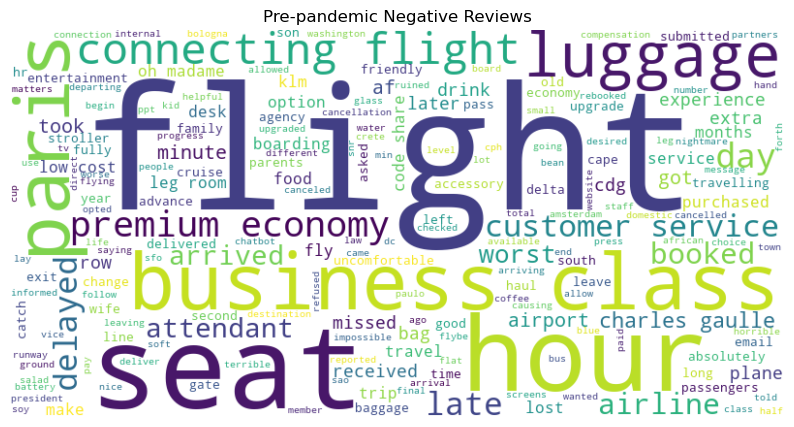

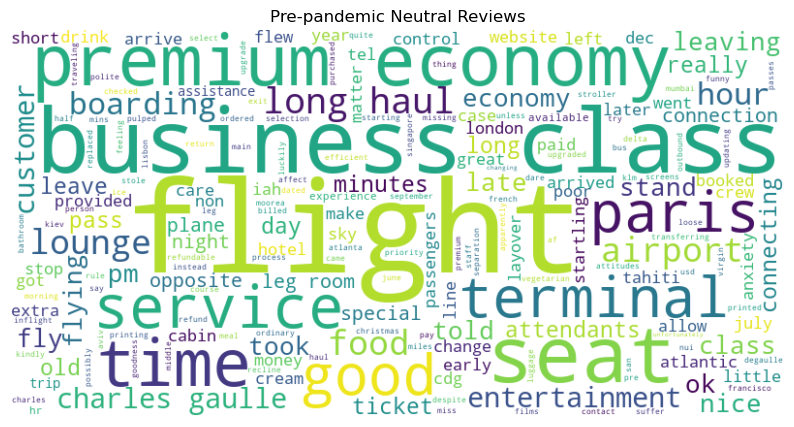

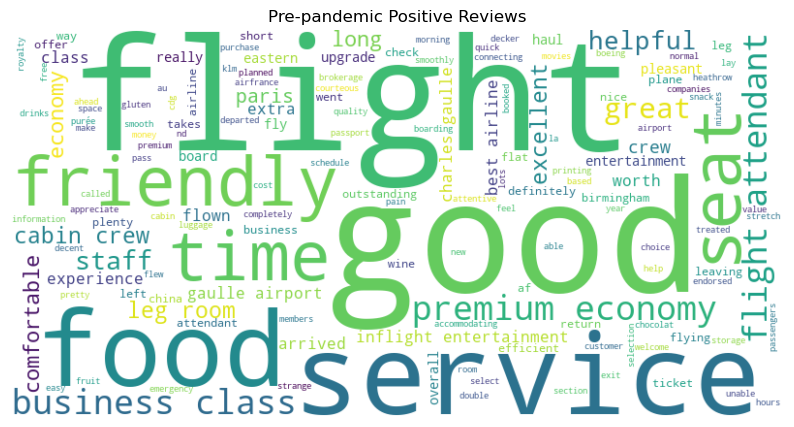

In [116]:
## plotting wordclouds for all the segments
plot_wordclouds(prepandemic_neg_topics.values.flatten(), 'Pre-pandemic Negative Reviews')
plot_wordclouds(prepandemic_neu_topics.values.flatten(), 'Pre-pandemic Neutral Reviews')
plot_wordclouds(prepandemic_pos_topics.values.flatten(), 'Pre-pandemic Positive Reviews')

In [117]:
## extracting topics for all ratings segments for all the segments [Pandemic]
pandemic_neg_topics = extract_topics(pandemic_df[pandemic_df['rating_segment'] == 'Negative'])
pandemic_neu_topics = extract_topics(pandemic_df[pandemic_df['rating_segment'] == 'Neutral'])
pandemic_pos_topics = extract_topics(pandemic_df[pandemic_df['rating_segment'] == 'Positive'])

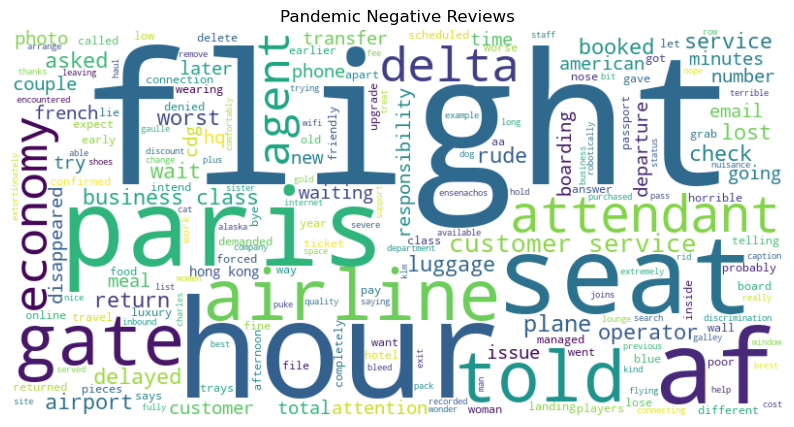

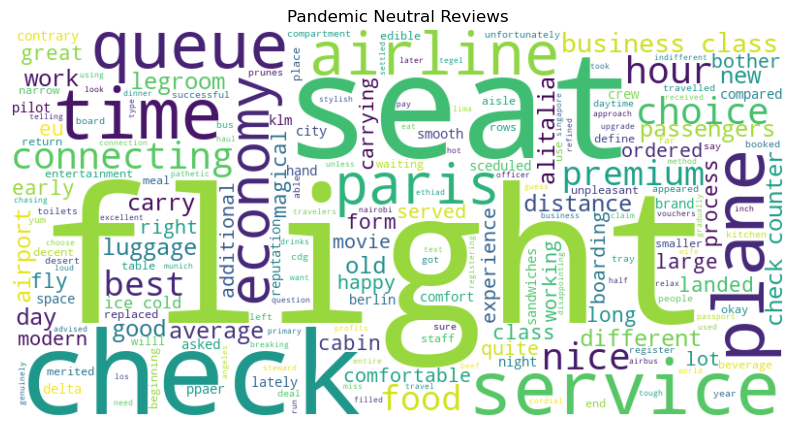

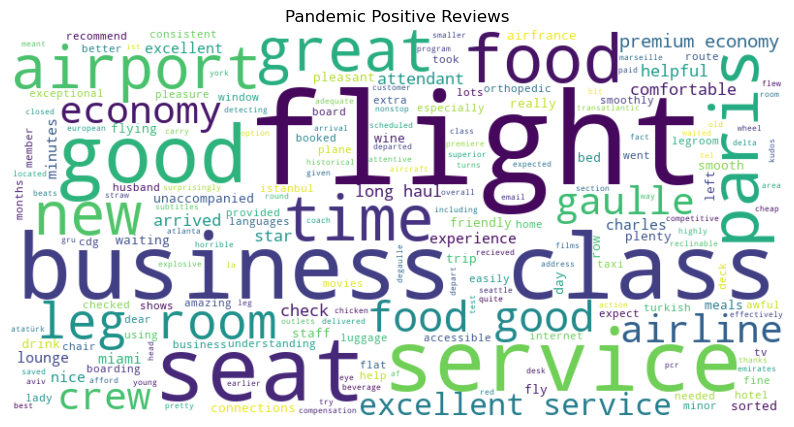

In [118]:
## plotting wordclouds for all the segments
plot_wordclouds(pandemic_neg_topics.values.flatten(), 'Pandemic Negative Reviews')
plot_wordclouds(pandemic_neu_topics.values.flatten(), 'Pandemic Neutral Reviews')
plot_wordclouds(pandemic_pos_topics.values.flatten(), 'Pandemic Positive Reviews')

In [137]:
## extracting topics for all ratings segments for all the segments [Postpandemic]
postpandemic_neg_topics = extract_topics(postpandemic_df[postpandemic_df['rating_segment'] == 'Negative'])
postpandemic_neu_topics = extract_topics(postpandemic_df[postpandemic_df['rating_segment'] == 'Neutral'])
postpandemic_pos_topics = extract_topics(postpandemic_df[postpandemic_df['rating_segment'] == 'Positive'])

In [138]:
# # Concatenate the dataframes for negative, neutral, and positive topics
# postpandemic_all_topics = pd.concat([postpandemic_neg_topics, postpandemic_neu_topics, postpandemic_pos_topics])

# # Count the occurrences of each topic
# topic_counts = postpandemic_all_topics.apply(pd.Series.value_counts).fillna(0).sum(axis=1).sort_values(ascending=False)

# # Display the topic counts
# topic_counts.head()

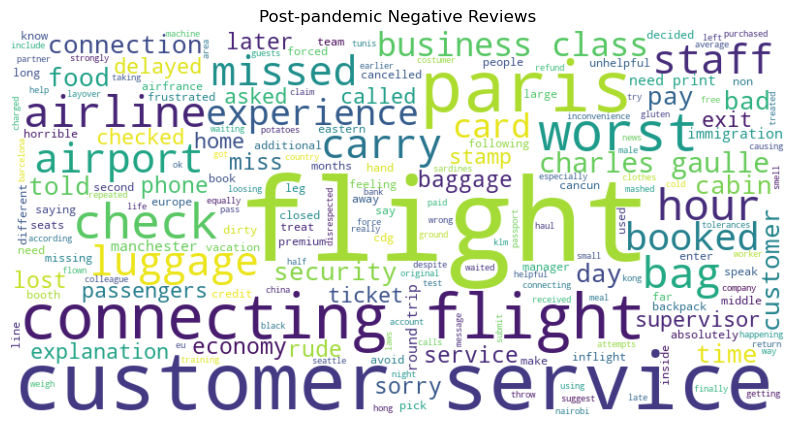

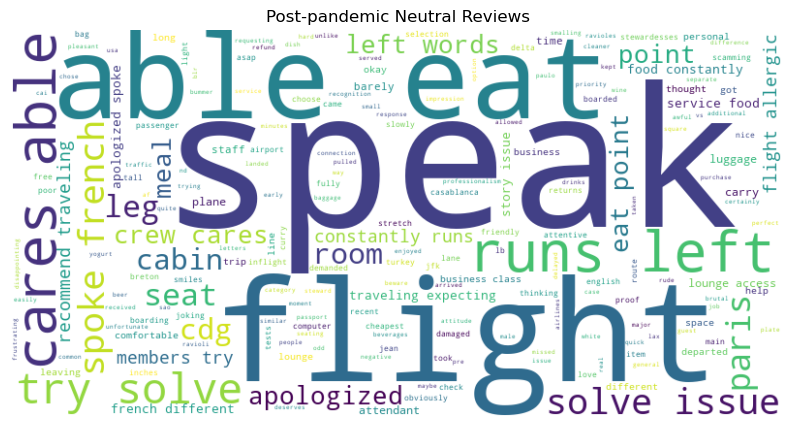

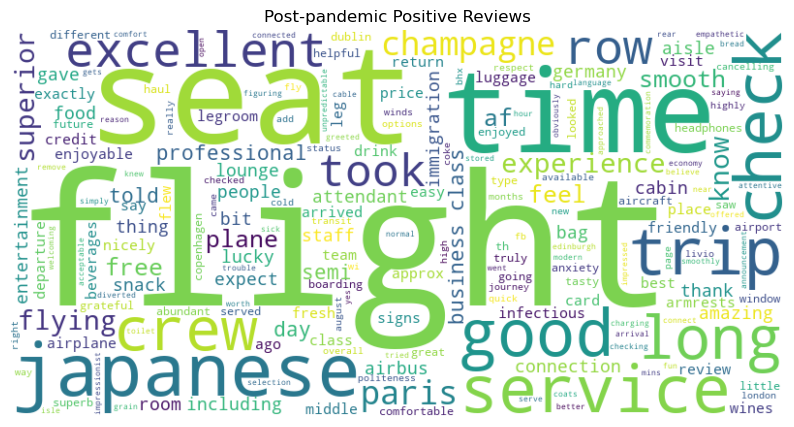

In [139]:
## plotting wordclouds for all the segments
plot_wordclouds(postpandemic_neg_topics.values.flatten(), 'Post-pandemic Negative Reviews')
plot_wordclouds(postpandemic_neu_topics.values.flatten(), 'Post-pandemic Neutral Reviews')
plot_wordclouds(postpandemic_pos_topics.values.flatten(), 'Post-pandemic Positive Reviews')

## 3. Comparative Analysis

### Track Changes Over Time:
 1. For each negative topic from the initial period, check if it persists in later periods.
 2. Identify new issues or improvements that appeared in later periods.

### Evaluate Responses to Feedback:
 1. Check if the company addressed any major concerns highlighted in earlier reviews.
 2. Look for shifts in sentiment and new areas of satisfaction or dissatisfaction.

In [140]:
## Track Changes Over Time
## function to track changes over time

def track_changes_over_time(df, segment):
    # Group by date and rating
    datewise_ratings = df.groupby([df['date'].dt.to_period('M'), 'rating_segment'])['rating'].count().unstack().fillna(0)
    
    # Calculate the percentage of each rating
    datewise_ratings['Total'] = datewise_ratings.sum(axis=1)
    datewise_ratings['Negative'] = (datewise_ratings['Negative'] / datewise_ratings['Total'] * 100).round(2)
    datewise_ratings['Neutral'] = (datewise_ratings['Neutral'] / datewise_ratings['Total'] * 100).round(2)
    datewise_ratings['Positive'] = (datewise_ratings['Positive'] / datewise_ratings['Total'] * 100).round(2)
    
    # Plot the changes
    plt.figure(figsize=(10, 6))
    datewise_ratings[['Negative', 'Neutral', 'Positive']].plot(kind='line', title=f'{segment} Reviews Over Time')
    plt.xlabel('Date')
    plt.ylabel('Percentage')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

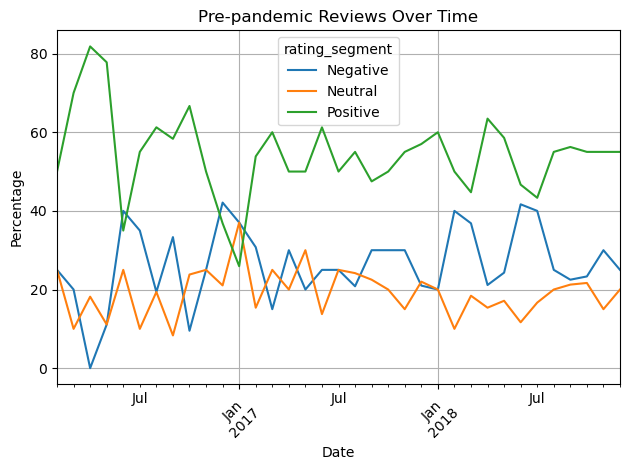

In [141]:
## tracking changes over time for all the segments
track_changes_over_time(prepandemic_df, 'Pre-pandemic')

<Figure size 1000x600 with 0 Axes>

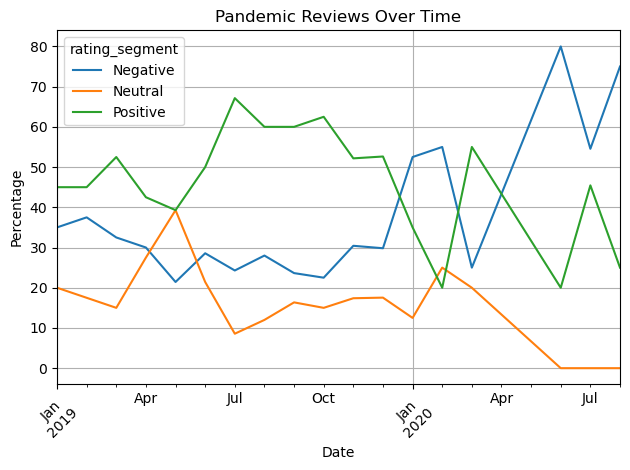

In [142]:
track_changes_over_time(pandemic_df, 'Pandemic')

<Figure size 1000x600 with 0 Axes>

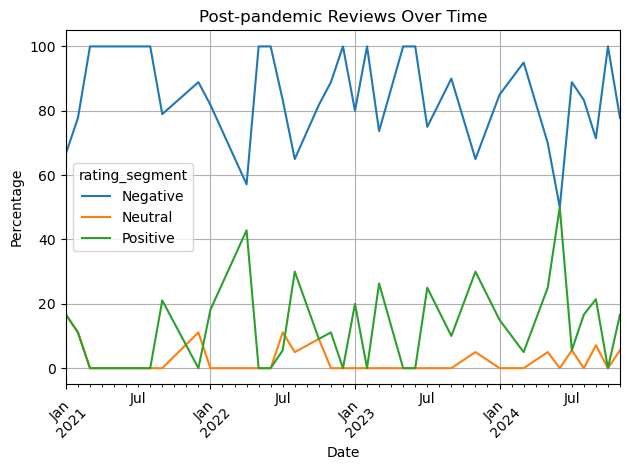

In [143]:
track_changes_over_time(postpandemic_df, 'Post-pandemic')